In [1]:

relu_he_loss_loaded = []
relu_he_validation_loaded = []

elu_he_loss_loaded = []
elu_he_acc_validation_loaded = []

gelu_he_loss_loaded = []
gelu_he_acc_validation_loaded = []

silu_he_loss_loaded = []
silu_he_acc_validation_loaded = []

selu_he_loss_loaded = []
selu_he_acc_validation_loaded = []
###

elu_const_var_loss_loaded = []
elu_const_var_acc_validation_loaded = []

gelu_const_var_loss_loaded = []
gelu_const_var_acc_validation_loaded = []

silu_const_var_loss_loaded = []
silu_const_var_acc_validation_loaded = []

selu_const_var_loss_loaded = []
selu_const_var_acc_validation_loaded = []


for i in range(0, 5):
    # Load in data
    def loadOpenFile(filename, i = 0):
        return open("HeCIFAR_test/" + str(i) + "/" + filename, "r")

    # Load data
    with loadOpenFile("relu_he_loss_arr", i) as f:
        relu_he_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("relu_he_acc_validation", i) as f:
        relu_he_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    #######################

    with loadOpenFile("elu_const_var_loss_arr", i) as f:
        elu_const_var_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("elu_const_var_acc_validation", i) as f:
        elu_const_var_acc_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    with loadOpenFile("elu_relu_normal_loss_arr", i) as f:
        elu_he_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("elu_relu_normal_acc_validation", i) as f:
        elu_he_acc_validation_loaded.append( [float(i[1:-1]) for i in f.read().split(",")])

    #######################

    with loadOpenFile("gelu_const_var_loss_arr", i) as f:
        gelu_const_var_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("gelu_const_var_acc_validation", i) as f:
        gelu_const_var_acc_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    with loadOpenFile("gelu_relu_loss_arr", i) as f:
        gelu_he_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("gelu_relu_acc_validation", i) as f:
        gelu_he_acc_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    #######################

    with loadOpenFile("silu_const_var_loss_arr", i) as f:
        silu_const_var_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("silu_const_var_acc_validation", i) as f:
        silu_const_var_acc_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    with loadOpenFile("silu_relu_loss_arr", i) as f:
        silu_he_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("silu_relu_acc_validation", i) as f:
        silu_he_acc_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    #######################

    with loadOpenFile("selu_const_var_loss_arr", i) as f:
        selu_const_var_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("selu_const_var_acc_validation", i) as f:
        selu_const_var_acc_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    with loadOpenFile("selu_he_loss_arr", i) as f:
        selu_he_loss_loaded.append([float(i) for i in f.read().split(",")])

    with loadOpenFile("selu_he_acc_validation", i) as f:
        selu_he_acc_validation_loaded.append([float(i[1:-1]) for i in f.read().split(",")])

    #with loadOpenFile("const_var_uniform_loss_arr") as f:
    #    const_var_loss_uniform_loaded = [float(i) for i in f.read().split(",")]

    #with loadOpenFile("const_var_uniform_acc_validation") as f:
    #    const_var_acc_validation_uniform_loaded = [float(i[1:-1]) for i in f.read().split(",")]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def window_data(data, moving_window_size=160):
    return np.convolve(data, np.ones(moving_window_size), 'valid') / moving_window_size

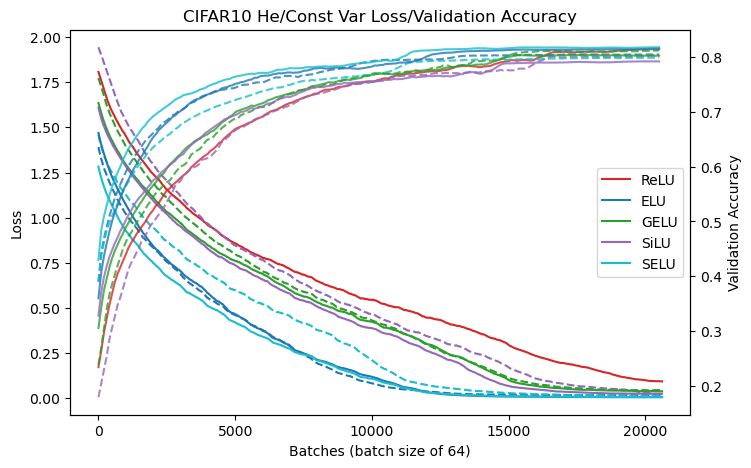

In [51]:
fig, ax = plt.subplots(figsize=(8, 5))

def genX(recorded_every, num_data):
    return [i*recorded_every for i in range(len(num_data))]

loss_recorded_every = 11.2

def get_result(x, valid=False):
    if valid:
        return np.median(x, axis=0)[0:213]
    else:
        return np.median(x, axis=0)[0:2000]

ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), window_data(get_result(relu_he_loss_loaded)), label="ReLU", c="tab:red")
ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), window_data(get_result(elu_he_loss_loaded)),linestyle="--", c="tab:blue")
ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), window_data(get_result(gelu_he_loss_loaded)),linestyle="--", c="tab:green")
ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), np.array(window_data(get_result(silu_he_loss_loaded))),linestyle="--", c="tab:purple")
ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), np.array(window_data(get_result(selu_he_loss_loaded))), linestyle="--", c="tab:cyan")

ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), window_data(get_result(elu_const_var_loss_loaded)),  label="ELU", c="tab:blue")
ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), window_data(get_result(gelu_const_var_loss_loaded)),  label="GELU", c="tab:green")
ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), np.array(window_data(get_result(silu_const_var_loss_loaded))), label="SiLU", c="tab:purple")
ax.plot(genX(loss_recorded_every, window_data(get_result(relu_he_loss_loaded))), np.array(window_data(get_result(selu_const_var_loss_loaded))), label="SELU", c="tab:cyan")

valid_alpha = 0.8

window_size = 8

valid_recorded_every = 100
ax_twinx = ax.twinx()

ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(relu_he_validation_loaded, True), window_size)), label="Xavier", alpha=valid_alpha, c="tab:red") #
ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(elu_he_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:blue", linestyle="--")
ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(gelu_he_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:green", linestyle="--")
ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(silu_he_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:purple", linestyle="--")
ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(selu_he_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:cyan", linestyle="--")

ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(elu_const_var_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:blue")
ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(gelu_const_var_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:green")
ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(silu_const_var_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:purple")
ax_twinx.plot(genX(valid_recorded_every, window_data(get_result(relu_he_validation_loaded, True), window_size)), np.array(window_data(get_result(selu_const_var_acc_validation_loaded, True), window_size)), alpha=valid_alpha, c="tab:cyan")

ax.set_title("CIFAR10 He/Const Var Loss/Validation Accuracy")

ax.set_ylabel("Loss")
ax.set_xlabel("Batches (batch size of 64)")
ax_twinx.set_ylabel("Validation Accuracy")
ax.legend(loc="center right")
plt.savefig("./ReLUCIFAR10LV6.png", dpi=360, bbox_inches="tight")

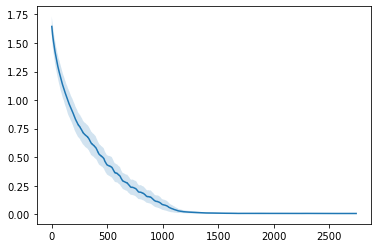

In [7]:
def get_mean(data):
    return np.mean(data, axis=0)

def get_std(data):
    return np.std(data, axis=0)

window_size = 100

get_mean(elu_const_var_loss_loaded)
get_std(elu_const_var_loss_loaded)

means = window_data(get_mean(elu_const_var_loss_loaded), window_size)
stds = window_data(get_std(elu_const_var_loss_loaded), window_size)

plt.plot(means)
plt.fill_between(range(len(means)), means-stds, means+stds, alpha=0.2)
plt.savefig("someTest2.png")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def get_mean(data):
    return np.mean(data, axis=0)

def get_std(data):
    return np.std(data, axis=0)


In [6]:
const_var_losses = {
    "ELU": get_mean(elu_const_var_loss_loaded),
    "GELU": get_mean(gelu_const_var_loss_loaded),
    "SILU": get_mean(silu_const_var_loss_loaded),
    "SELU": get_mean(selu_const_var_loss_loaded),
    "RELU": get_mean(silu_const_var_loss_loaded)
}

const_var_losses_stds = {
    "ELU": get_std(elu_const_var_loss_loaded),
    "GELU": get_std(gelu_const_var_loss_loaded),
    "SILU": get_std(silu_const_var_loss_loaded),
    "SELU": get_std(selu_const_var_loss_loaded),
    "RELU": get_std(silu_const_var_loss_loaded)
}

he_losses = {
    "ELU": get_mean(elu_he_loss_loaded),
    "GELU": get_mean(gelu_he_loss_loaded),
    "SILU": get_mean(silu_he_loss_loaded),
    "SELU": get_mean(selu_he_loss_loaded),
    "RELU": get_mean(relu_he_loss_loaded)
}

he_losses_stds = {
    "ELU": get_std(elu_he_loss_loaded),
    "GELU": get_std(gelu_he_loss_loaded),
    "SILU": get_std(silu_he_loss_loaded),
    "SELU": get_std(selu_he_loss_loaded),
    "RELU": get_std(relu_he_loss_loaded)
}

const_var_accs = {
    "ELU": get_mean(elu_const_var_acc_validation_loaded),
    "GELU": get_mean(gelu_const_var_acc_validation_loaded),
    "SILU": get_mean(silu_const_var_acc_validation_loaded),
    "SELU": get_mean(selu_const_var_acc_validation_loaded),
    "RELU": get_mean(relu_he_validation_loaded)
}

const_var_accs_stds = {
    "ELU": get_std(elu_const_var_acc_validation_loaded),
    "GELU": get_std(gelu_const_var_acc_validation_loaded),
    "SILU": get_std(silu_const_var_acc_validation_loaded),
    "SELU": get_std(selu_const_var_acc_validation_loaded),
    "RELU": get_std(relu_he_validation_loaded)
}

he_accs = {
    "ELU": get_mean(elu_he_acc_validation_loaded),
    "GELU": get_mean(gelu_he_acc_validation_loaded),
    "SILU": get_mean(silu_he_acc_validation_loaded),
    "SELU": get_mean(selu_he_acc_validation_loaded),
    "RELU": get_mean(relu_he_validation_loaded)
}

he_accs_stds = {
    "ELU": get_std(elu_he_acc_validation_loaded),
    "GELU": get_std(gelu_he_acc_validation_loaded),
    "SILU": get_std(silu_he_acc_validation_loaded),
    "SELU": get_std(selu_he_acc_validation_loaded),
    "RELU": get_std(relu_he_validation_loaded)
}

activation_color_dict = {
    "ELU": "tab:blue",
    "GELU": "tab:green",
    "SILU": "tab:purple",
    "SELU": "tab:cyan",
    "RELU": "tab:red"
}

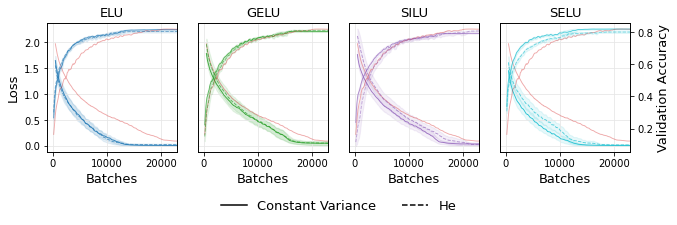

In [9]:
start = 1
stop = 5

include = ["ELU", "GELU", "SILU", "SELU"]

plt.rcParams.update({
    "text.usetex": False,
})

plt.rcParams.update({'font.size': 14})
font_size = 13

plt.rc('font', size=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('axes', titlesize=font_size)

plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=10)

plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)

fig, ax = plt.subplots(1, stop-start, figsize=(4.8*2, 0.96*1.5*2))
lw=0.9

tick_font_size = 8

window_size = 100
valid_window_size = 4
ax[0].set_ylabel("Loss")

std_alpha = 0.1

##########################################################
####################### LOSS #############################
##########################################################
cur_i = 0
for i, (activation_function, loss) in enumerate(const_var_losses.items()):
    if activation_function not in include:
        continue
    i = cur_i

    ax[i].grid(visible=True, which='both', color='0.9', linestyle='-') #0.65
    ax[i].set_title(activation_function)
    ax[i].set_xlabel("Batches")
    ax[i].sharey(ax[0])
    ax[i].set_xlim([-1_000, 23_000])
    ax[i].set_xticks([0, 10_000, 20_000])

    if i != 0:
        ax[i].label_outer()
        ax[i].tick_params('y', width=0)

    x_axis = [(window_size/2)*10 + i*100*len(relu_he_validation_loaded[0])/len(relu_he_loss_loaded[0]) for i in range(len(window_data(loss, window_size)))]
    means = window_data(loss, window_size)
    stds = window_data(const_var_losses_stds[activation_function], window_size)

    ax[i].fill_between(x_axis , means-stds, means+stds, color=activation_color_dict[activation_function], alpha=std_alpha)
    ax[i].plot(x_axis, means, label="Const Var: " + str(activation_function), color=activation_color_dict[activation_function], linestyle='-', alpha=0.9, lw=lw)

    ax[i].plot([(window_size/2)*10 + i*100*len(relu_he_validation_loaded[0])/len(relu_he_loss_loaded[0]) for i in range(len(window_data(he_losses["RELU"], window_size)))], window_data(he_losses["RELU"], window_size), color=activation_color_dict["RELU"], linestyle='-', alpha=0.4, lw=lw)

    cur_i += 1

############################ HE ##########################
cur_i = 0
for i, (activation_function, loss) in enumerate(he_losses.items()):
    if activation_function not in include:
        continue
    i = cur_i

    x_axis = [(window_size/2)*10 + i*100*len(relu_he_validation_loaded[0])/len(relu_he_loss_loaded[0]) for i in range(len(window_data(loss, window_size)))]
    means = window_data(loss, window_size)
    stds = window_data(he_losses_stds[activation_function], window_size)

    ax[i].fill_between(x_axis , means-stds, means+stds, color=activation_color_dict[activation_function], alpha=std_alpha)
    ax[i].plot(x_axis, means, label="Xavier: " +str(activation_function), color=activation_color_dict[activation_function], linestyle='--', alpha=0.7, lw=lw)

    cur_i += 1


##########################################################
##################### ACCURACY ###########################
##########################################################
valid_alpha = 0.8
ax_valid = [a.twinx() for a in ax]

cur_i = 0
window_size = 4
for i, (activation_function, loss) in enumerate(const_var_accs.items()): #[start:stop]
    if activation_function not in include:
        continue
    i = cur_i
    ax_valid[stop-start-1].set_ylabel("Validation Accuracy")
    ax_valid[i].sharey(ax_valid[0])
    if i + start != stop-1:
        ax_valid[i].label_outer()
        ax_valid[i].tick_params('y', width=0)

    x_axis = [((window_size/2)*100+i*100) for i in range(len(window_data(loss, window_size)))]
    means = window_data(loss, window_size)
    stds = window_data(const_var_accs_stds[activation_function], window_size)

    ax_valid[i].fill_between(x_axis , means-stds, means+stds, color=activation_color_dict[activation_function], alpha=std_alpha)
    ax_valid[i].plot(x_axis, means, label="Const Var: " + str(activation_function), color=activation_color_dict[activation_function], linestyle='-', alpha=0.9*valid_alpha, lw=lw)
    ax_valid[i].plot([((window_size/2)*100+i*100) for i in range(len(window_data(he_accs["RELU"], window_size)))], window_data(he_accs["RELU"], window_size), color=activation_color_dict["RELU"], linestyle='-', alpha=0.4, lw=lw)
    cur_i += 1

############################ HE ##########################
cur_i = 0
for i, (activation_function, loss) in enumerate(he_accs.items()):
    if activation_function not in include:
        continue
    i = cur_i
    x_axis = [((window_size/2)*100+i*100) for i in range(len(window_data(loss, window_size)))]
    means = window_data(loss, window_size)
    stds = window_data(he_accs_stds[activation_function], window_size)

    ax_valid[i].fill_between(x_axis , means-stds, means+stds, color=activation_color_dict[activation_function], alpha=std_alpha)
    ax_valid[i].plot(x_axis, window_data(loss, window_size), label="Xavier: " +str(activation_function), color=activation_color_dict[activation_function], linestyle='--', alpha=0.7*valid_alpha, lw=lw)
    cur_i += 1

labels = ["Constant Variance", "He"]

red_patch = mpatches.Patch(color='red', label='The red data')
line1 = mlines.Line2D([], [], color='black', label='Constant Variance')
line2 = mlines.Line2D([], [], color='black', label='He', linestyle="--")

#left, bottom, width, height
fig.legend(handles=[line1, line2], loc="center",  bbox_to_anchor=(0.5, -0.03, 0, 0),  ncol=2, frameon=False)
fig.tight_layout()
fig.savefig("./CIFAR10_VGG19_loss_valid_after10.png", bbox_inches='tight', dpi=800)


In [34]:
window_size = 1

# Get final accuracy difference
print("He ReLU Final: " + str(window_data(get_result(relu_he_validation_loaded), window_size)[-1]))
print("He ELU Final: " + str(window_data(get_result(elu_he_acc_validation_loaded), window_size)[-1]))
print("He GELU Final: " + str(window_data(get_result(gelu_he_acc_validation_loaded), window_size)[-1]))
print("He SILU Final: " + str(window_data(get_result(silu_he_acc_validation_loaded), window_size)[-1]))
print("He SELU Final: " + str(window_data(get_result(selu_he_acc_validation_loaded), window_size)[-1]))
print()

print("Const Var ELU Final: " + str(window_data(get_result(elu_const_var_acc_validation_loaded), window_size)[-1]))
print("Const Var GELU Final: " + str(window_data(get_result(gelu_const_var_acc_validation_loaded), window_size)[-1]))
print("Const Var SILU Final: " + str(window_data(get_result(silu_const_var_acc_validation_loaded), window_size)[-1]))
print("Const Var SELU Final: " + str(window_data(get_result(selu_const_var_acc_validation_loaded), window_size)[-1]))


He ReLU Final: 0.81659996509552
He ELU Final: 0.8051999807357788
He GELU Final: 0.8119999766349792
He SILU Final: 0.8037999868392944
He SELU Final: 0.7985999584197998

Const Var ELU Final: 0.8143999576568604
Const Var GELU Final: 0.8029999732971191
Const Var SILU Final: 0.792199969291687
Const Var SELU Final: 0.8169999718666077


In [27]:
window_size = 1

# Get final accuracy difference
print("He ReLU Final: " + str(window_data(get_result(relu_he_loss_loaded), window_size)[-1]))
print("He ELU Final: " + str(window_data(get_result(elu_he_loss_loaded), window_size)[-1]))
print("He GELU Final: " + str(window_data(get_result(gelu_he_loss_loaded), window_size)[-1]))
print("He SILU Final: " + str(window_data(get_result(silu_he_loss_loaded), window_size)[-1]))
print()

print("Const Var ELU Final: " + str(window_data(get_result(elu_const_var_loss_loaded), window_size)[-1]))
print("Const Var GELU Final: " + str(window_data(get_result(gelu_const_var_loss_loaded), window_size)[-1]))
print("Const Var SILU Final: " + str(window_data(get_result(silu_const_var_loss_loaded), window_size)[-1]))


He ReLU Final: 0.08202848583459854
He ELU Final: 0.009648283012211323
He GELU Final: 0.03255802392959595
He SILU Final: 0.014453300274908543

Const Var ELU Final: 0.004551565740257502
Const Var GELU Final: 0.035282913595438004
Const Var SILU Final: 0.018180765211582184
